# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [9]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [11]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [6]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # ( , )
print(f"Feature Names: {diabetes.feature_names}")
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인

Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [7]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.describe()

age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

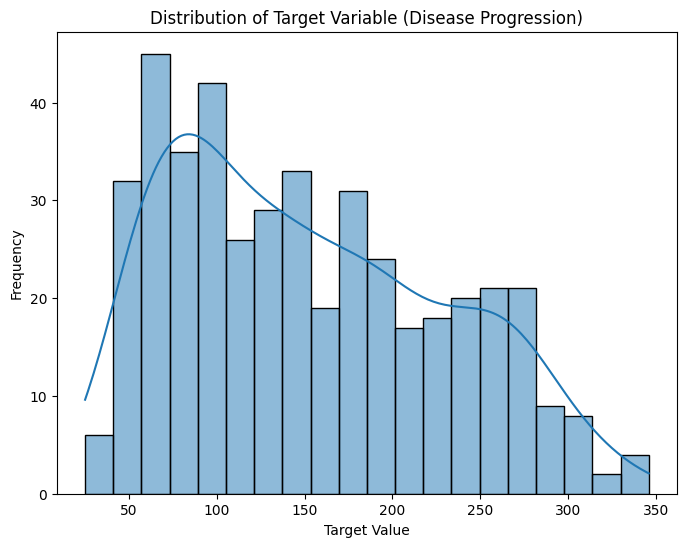

In [8]:
# 히스토그램으로 타겟 값 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

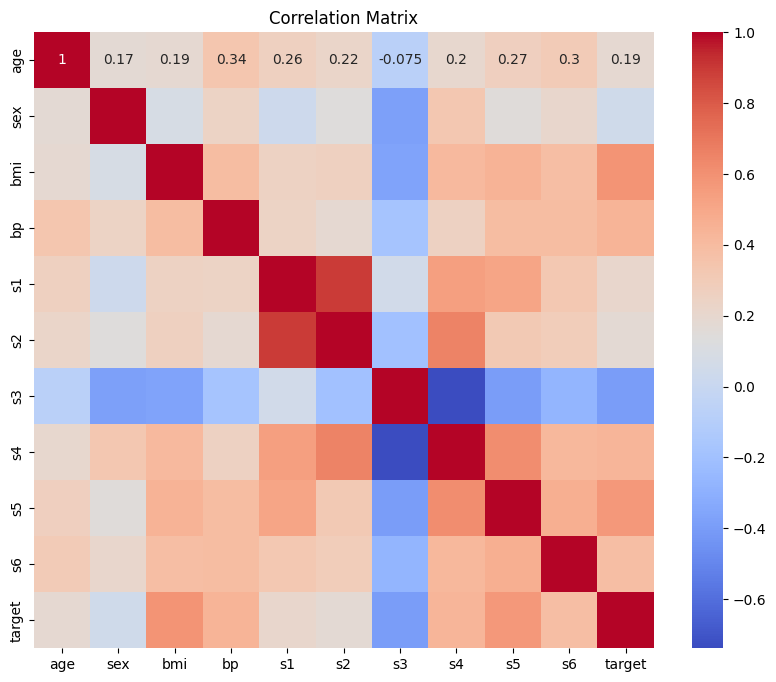

In [9]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

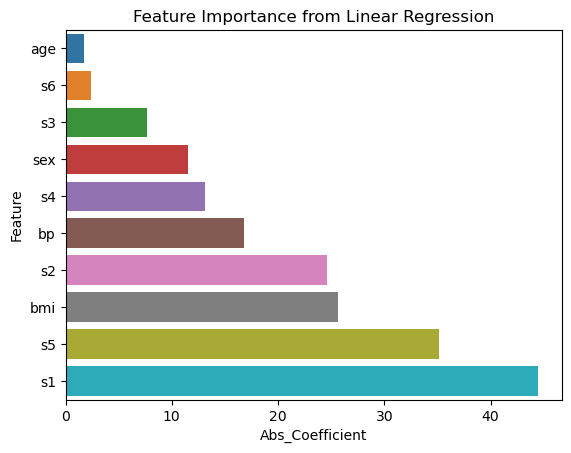

Q1-1 결론:
선형회귀 모델의 계수를 기준으로 분석한 결과, 's1' 피처가 target 예측에 가장 큰 영향을 미치는 것으로 나타났습니다.
그 다음으로 중요한 피처는 's5'와 'bmi'로 확인되며, 이는 타겟 값에 큰 영향을 주는 변수입니다.
따라서 모델 성능 향상 및 해석을 위해 이 세 가지 피처(s1, s5, bmi)를 특히 주의 깊게 살펴볼 필요가 있습니다.


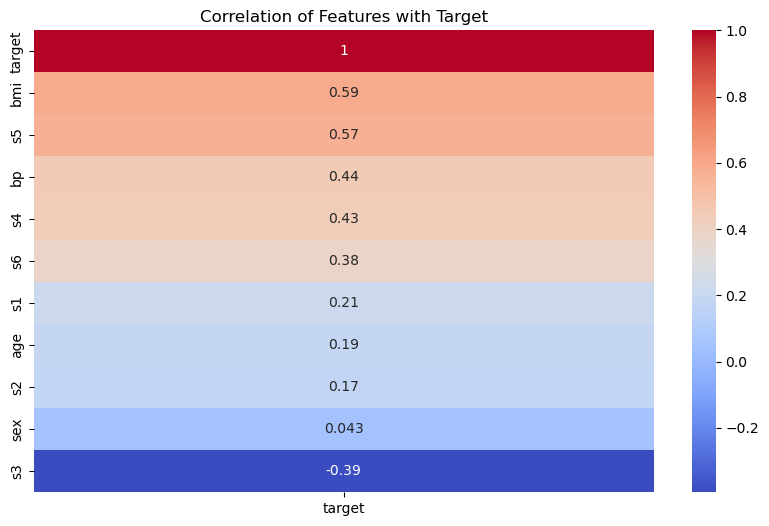

Q1-2 결론:
상관계수 분석 결과, 'bmi' 피처가 'target'과 가장 높은 양의 상관관계를 가지는 것으로 나타났습니다.
그 다음으로 's5', 'bp' 등의 피처도 비교적 높은 상관관계를 가지며, 예측에 영향을 줄 수 있습니다.
반면 's3'와 'sex'는 target과의 상관관계가 낮은 것으로 분석됩니다.


In [19]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.

# 데이터 분할 (훈련 / 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 피처 이름과 계수 출력
feature_names = diabetes.feature_names  # 또는 X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})
coef_df.sort_values(by='Abs_Coefficient', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df.sort_values(by='Abs_Coefficient'))
plt.title('Feature Importance from Linear Regression')
plt.show()


# 상위 계수 추출
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# 상위 3개 피처 이름
top1 = coef_df_sorted.iloc[0]['Feature']
top2 = coef_df_sorted.iloc[1]['Feature']
top3 = coef_df_sorted.iloc[2]['Feature']

# 자동 문장 출력
print("Q1-1 결론:")
print(f"선형회귀 모델의 계수를 기준으로 분석한 결과, '{top1}' 피처가 target 예측에 가장 큰 영향을 미치는 것으로 나타났습니다.")
print(f"그 다음으로 중요한 피처는 '{top2}'와 '{top3}'로 확인되며, 이는 타겟 값에 큰 영향을 주는 변수입니다.")
print(f"따라서 모델 성능 향상 및 해석을 위해 이 세 가지 피처({top1}, {top2}, {top3})를 특히 주의 깊게 살펴볼 필요가 있습니다.")

# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?

import pandas as pd

# X, y를 하나로 합친 데이터프레임 만들기
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

# target과의 상관관계만 추출
corr_with_target = df.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Target")
plt.show()

# 상위 변수 추출
top1 = corr_with_target.index[0]
top2 = corr_with_target.index[1]
top3 = corr_with_target.index[2]
bottom1 = corr_with_target.index[-1]
bottom2 = corr_with_target.index[-2]

# 자동 문장 출력
print("Q1-2 결론:")
print(f"상관계수 분석 결과, '{top1}' 피처가 'target'과 가장 높은 양의 상관관계를 가지는 것으로 나타났습니다.")
print(f"그 다음으로 '{top2}', '{top3}' 등의 피처도 비교적 높은 상관관계를 가지며, 예측에 영향을 줄 수 있습니다.")
print(f"반면 '{bottom1}'와 '{bottom2}'는 target과의 상관관계가 낮은 것으로 분석됩니다.")


## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [11]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?

# 테스트 비율 리스트
test_ratios = [0.3, 0.2, 0.1]  # 70:30, 80:20, 90:10

print("데이터 분할 비율에 따른 성능 비교:")
for ratio in test_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"테스트 비율: {int(ratio*100)}% → MSE: {mse:.2f}, R²: {r2:.4f}")

데이터 분할 비율에 따른 성능 비교:
테스트 비율: 30% → MSE: 2821.74, R²: 0.4773
테스트 비율: 20% → MSE: 2900.17, R²: 0.4526
테스트 비율: 10% → MSE: 2743.88, R²: 0.5514


In [21]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.
# 스케일링 없이 학습
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.2, random_state=42)

model_ns = LinearRegression()
model_ns.fit(X_train_ns, y_train_ns)

y_pred_ns = model_ns.predict(X_test_ns)

mse_ns = mean_squared_error(y_test_ns, y_pred_ns)
r2_ns = r2_score(y_test_ns, y_pred_ns)

print("\n 스케일링 안 했을 때 성능:")
print(f"MSE: {mse_ns:.2f}, R²: {r2_ns:.4f}")


 스케일링 안 했을 때 성능:
MSE: 2900.17, R²: 0.4526


## 3. 모델 적합 (선형 회귀)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  0.93021835 -12.45911403  23.89897186  16.18560604 -40.0813939
  22.89519346   5.77316158  11.44222639  34.18365151   3.39350981]
Model Intercept: 152.01007556675063


In [25]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.

# 피처 이름과 계수를 묶어서 DataFrame으로 정리
feature_names = diabetes.feature_names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})

# 절댓값 기준으로 정렬
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# 가장 영향력 있는 변수 3개 추출
top1 = coef_df_sorted.iloc[0]['Feature']
top2 = coef_df_sorted.iloc[1]['Feature']
top3 = coef_df_sorted.iloc[2]['Feature']

# 자동 분석 결과 출력
print("Q4 결론:")
print(f"선형 회귀 계수 분석 결과, '{top1}' 변수가 target 값에 가장 큰 영향을 주는 것으로 확인되었습니다.")
print(f"그 다음으로 '{top2}'와 '{top3}' 변수도 높은 영향력을 가지며, 모델 해석 시 중요하게 고려되어야 합니다.")


Q4 결론:
선형 회귀 계수 분석 결과, 's1' 변수가 target 값에 가장 큰 영향을 주는 것으로 확인되었습니다.
그 다음으로 's5'와 'bmi' 변수도 높은 영향력을 가지며, 모델 해석 시 중요하게 고려되어야 합니다.


In [17]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [18]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [29]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.

print("Q5 결론:")
print(f"선형 회귀 모델의 평균 제곱 오차(MSE)는 {mse:.2f}, 결정 계수(R²)는 {r2:.2f}입니다.")

if r2 < 0.6:
    print("R² 점수가 낮은 편이므로, 현재 모델은 타겟을 설명하는 데 한계가 있습니다.")
    print("특성(피처)을 추가로 분석하거나, 비선형 모델(Decision Tree, Random Forest 등)을 시도해보는 것이 좋습니다.")
else:
    print("R² 점수가 비교적 높게 나왔으므로, 모델이 타겟을 적절히 설명하고 있는 것으로 판단됩니다.")


# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest를 사용해 결과를 비교해보세요.

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 모델 목록 구성
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# 결과 저장용 리스트
results = []

# 각 모델에 대해 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

# 결과 출력
print(" Q6 결과: 다양한 회귀 모델 성능 비교")
for name, mse, r2 in results:
    print(f"{name} → MSE: {mse:.2f}, R²: {r2:.2f}")
    
# 가장 높은 R² 모델 탐색
best_model = max(results, key=lambda x: x[2])
print("\nQ6 결론:")
print(f"{best_model[0]} 모델이 가장 높은 R² 점수({best_model[2]:.2f})를 기록하여 target 예측에 가장 적합한 것으로 보입니다.")
print("선형 모델보다 비선형 모델(RF 등)이 더 좋은 성능을 보이면, 데이터에 비선형성이 존재할 수 있음을 의미합니다.")



Q5 결론:
선형 회귀 모델의 평균 제곱 오차(MSE)는 2904.48, 결정 계수(R²)는 0.53입니다.
R² 점수가 낮은 편이므로, 현재 모델은 타겟을 설명하는 데 한계가 있습니다.
특성(피처)을 추가로 분석하거나, 비선형 모델(Decision Tree, Random Forest 등)을 시도해보는 것이 좋습니다.
 Q6 결과: 다양한 회귀 모델 성능 비교
Linear Regression → MSE: 2743.88, R²: 0.55
Decision Tree → MSE: 5404.89, R²: 0.12
Random Forest → MSE: 2904.48, R²: 0.53

Q6 결론:
Linear Regression 모델이 가장 높은 R² 점수(0.55)를 기록하여 target 예측에 가장 적합한 것으로 보입니다.
선형 모델보다 비선형 모델(RF 등)이 더 좋은 성능을 보이면, 데이터에 비선형성이 존재할 수 있음을 의미합니다.


# 2. **분류 - with Iris dataset**

In [30]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. 데이터 로드 및 탐색

In [31]:
iris = load_iris()
X, y = iris.data, iris.target

feature_names = iris.feature_names
class_names = iris.target_names

In [32]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수) 
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
print(f"First 5 Samples:\n{X[:5]}")

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [35]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
unique, counts = np.unique(y, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution: {class_distribution}")

# 개별 출력도 추가
print("각 클래스의 샘플 수:")
for cls, cnt in class_distribution.items():
    print(f" - 클래스 {cls}: {cnt}개")

Class Distribution: {0: 50, 1: 50, 2: 50}
각 클래스의 샘플 수:
 - 클래스 0: 50개
 - 클래스 1: 50개
 - 클래스 2: 50개


In [36]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [26]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)   
count         150.000000        150.000000         150.000000  \
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

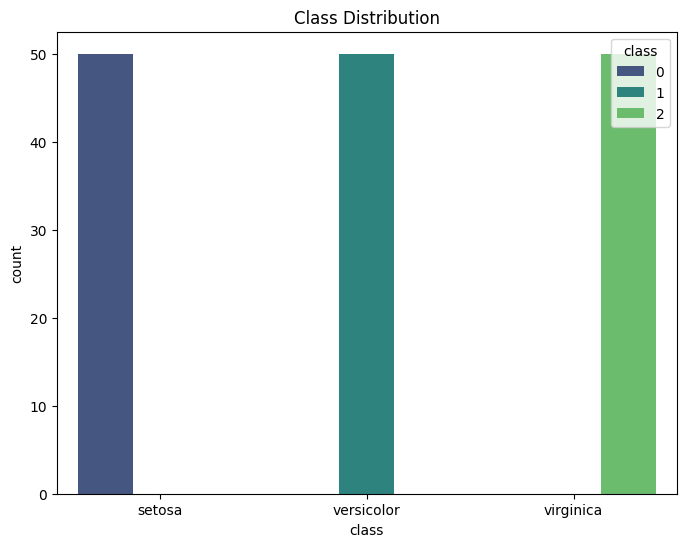

In [27]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

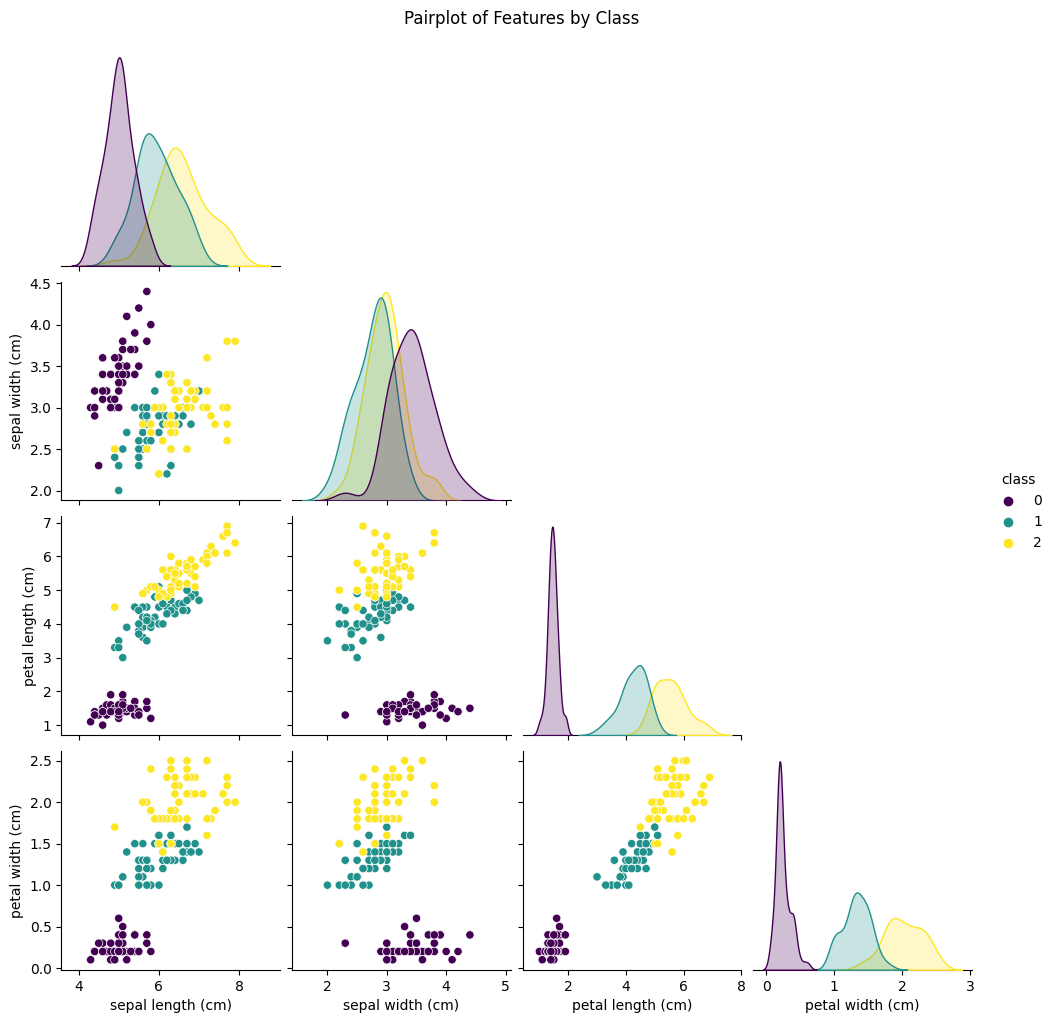

In [28]:
# 피처 간 산점도 행렬
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [38]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.
# stratify 없이 분할
X_train_nostr, X_test_nostr, y_train_nostr, y_test_nostr = train_test_split(X, y, test_size=0.2, random_state=42)

# stratify 적용하여 분할
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 클래스 비율 비교
print("Without stratify:")
print(dict(zip(*np.unique(y_test_nostr, return_counts=True))))

print("With stratify:")
print(dict(zip(*np.unique(y_test_str, return_counts=True))))

print("Q2 결론:")
print("stratify를 사용하지 않으면 클래스 비율이 훈련/테스트 세트에서 달라질 수 있어, 모델이 특정 클래스를 과소 학습하거나 과대 평가할 가능성이 있다.")
print("stratify=y를 넣어 분할하면 클래스 비율이 유지되어 공정한 모델 학습 및 평가가 가능하다.")

Without stratify:
{0: 10, 1: 9, 2: 11}
With stratify:
{0: 10, 1: 10, 2: 10}
Q2 결론:
stratify를 사용하지 않으면 클래스 비율이 훈련/테스트 세트에서 달라질 수 있어, 모델이 특정 클래스를 과소 학습하거나 과대 평가할 가능성이 있다.
stratify=y를 넣어 분할하면 클래스 비율이 유지되어 공정한 모델 학습 및 평가가 가능하다.


In [42]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?

from sklearn.linear_model import LogisticRegression

# 스케일링 없이 모델 학습
model_noscale = LogisticRegression(max_iter=1000)
model_noscale.fit(X_train, y_train)
acc_noscale = model_noscale.score(X_test, y_test)

# 스케일링 후 모델 학습
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = model_scaled.score(X_test_scaled, y_test)

print(f" Without Scaling Accuracy: {acc_noscale:.2f}")
print(f" With Scaling Accuracy: {acc_scaled:.2f}")

print("Q3 결론:")
if acc_scaled > acc_noscale:
    print("스케일링을 하지 않았을 때 정확도가 더 낮게 나왔다.")
    print("이는 각 피처의 스케일 차이가 모델 학습에 영향을 준 것으로, 스케일링을 통해 학습 안정성과 성능이 향상됨을 알 수 있다.")
else:
    print("스케일링 여부에 따른 정확도 차이가 크지 않지만, 일반적으로 스케일링은 안정적인 학습을 위해 필요하다.")

 Without Scaling Accuracy: 0.93
 With Scaling Accuracy: 0.93
Q3 결론:
스케일링 여부에 따른 정확도 차이가 크지 않지만, 일반적으로 스케일링은 안정적인 학습을 위해 필요하다.


## 3. 모델 적합 (SVM)

In [48]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

SVC(C=0.1, kernel='linear')

In [50]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?

C_list = [0.1, 1, 10]
print("Q4 결과: SVM 모델에서 C 값에 따른 성능 비교")

for C_val in C_list:
    model = SVC(kernel='linear', C=C_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C = {C_val:<4} → Accuracy: {acc:.2f}")

Q4 결과: SVM 모델에서 C 값에 따른 성능 비교
C = 0.1  → Accuracy: 0.93
C = 1    → Accuracy: 1.00
C = 10   → Accuracy: 0.97


In [59]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation 

In [60]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



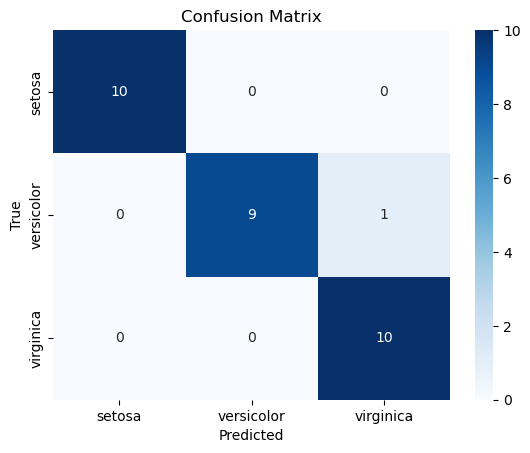

In [61]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [62]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.

# 클래스별 정확도 계산
true_total = np.sum(cm, axis=1)
true_correct = np.diag(cm)
class_accuracy = true_correct / true_total

# 출력
print("Q6 결론:")
for i, class_name in enumerate(iris.target_names):
    print(f" - 클래스 '{class_name}'의 정확도: {class_accuracy[i]:.2%} ({cm[i,i]} / {true_total[i]})")

print("\n전체적으로 'setosa'는 완벽히 분류되었으며, 'versicolor'와 'virginica'는 일부 혼동되었음을 알 수 있음.")
print("이는 두 클래스 간 경계가 더 유사하거나, 모델이 이 구분에 덜 민감할 수 있음을 시사")

Q6 결론:
 - 클래스 'setosa'의 정확도: 100.00% (10 / 10)
 - 클래스 'versicolor'의 정확도: 90.00% (9 / 10)
 - 클래스 'virginica'의 정확도: 100.00% (10 / 10)

전체적으로 'setosa'는 완벽히 분류되었으며, 'versicolor'와 'virginica'는 일부 혼동되었음을 알 수 있음.
이는 두 클래스 간 경계가 더 유사하거나, 모델이 이 구분에 덜 민감할 수 있음을 시사
